In [12]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

import numpy as np
import os

In [83]:
def plot_cwnd_vs_time(flavor = "default" , time = 5 , queueL = 5, noOfSource = 4, total_input_bandwidth = 2, bottleneck_bandwidth = 1, RTT = 10, recvWindow = 50):
    flavor = flavor.capitalize()
    
    os.system("ns dumbell_tcp.tcl {0} {1} {2} {3} {4} {5} {6} {7}".format(flavor, time, queueL, noOfSource, total_input_bandwidth, bottleneck_bandwidth, RTT, recvWindow))

    
    

    for i in range(noOfSource):
        
        cwndvstime = {}
        
        with open("tcp_{0}_{1}".format(flavor, i), "r") as f:
            lines = f.readlines()

        for line in lines:
            split_line = line.split()
            cwndvstime[float(split_line[0])] = float(split_line[1]);

        
        plt.plot(cwndvstime.keys(), cwndvstime.values() , label = "{0}".format(i))
        plt.xlabel("time")
        plt.ylabel("cwnd")
        f.close()
       
        
        

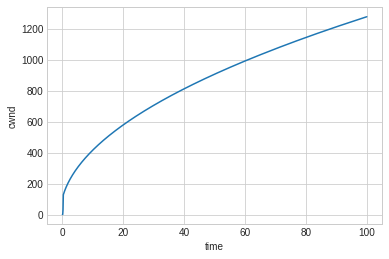

In [86]:
plot_cwnd_vs_time(flavor = "tahoe", time = 100, queueL = 2084, noOfSource = 1, total_input_bandwidth = 120, bottleneck_bandwidth= 100, RTT = 10, recvWindow = 1000)